In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline  

In [5]:
file = "data/ngc1245.csv"
#True color index = B - V - 0.96, where 0.96 is the reddening correction
df = pd.read_csv(file)
df.head()

,starNumber,B,V
0,1,NaN,NaN
1,2,NaN,NaN
2,3,11.673,10.964
3,4,NaN,NaN
4,5,12.705,11.768


In [6]:
reddening_value = 0.3 #magnitudes

df['B-V'] = df['B']-df['V']
df['V_corrected'] = df['V']-(3.2*reddening_value)
df['B-V_corrected'] = df['B-V']-reddening_value
df.head()

,starNumber,B,V,B-V,V_corrected,B-V_corrected
0,1,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN
2,3,11.673,10.964,0.709,10.004,0.409
3,4,NaN,NaN,NaN,NaN,NaN
4,5,12.705,11.768,0.937,10.808,0.637


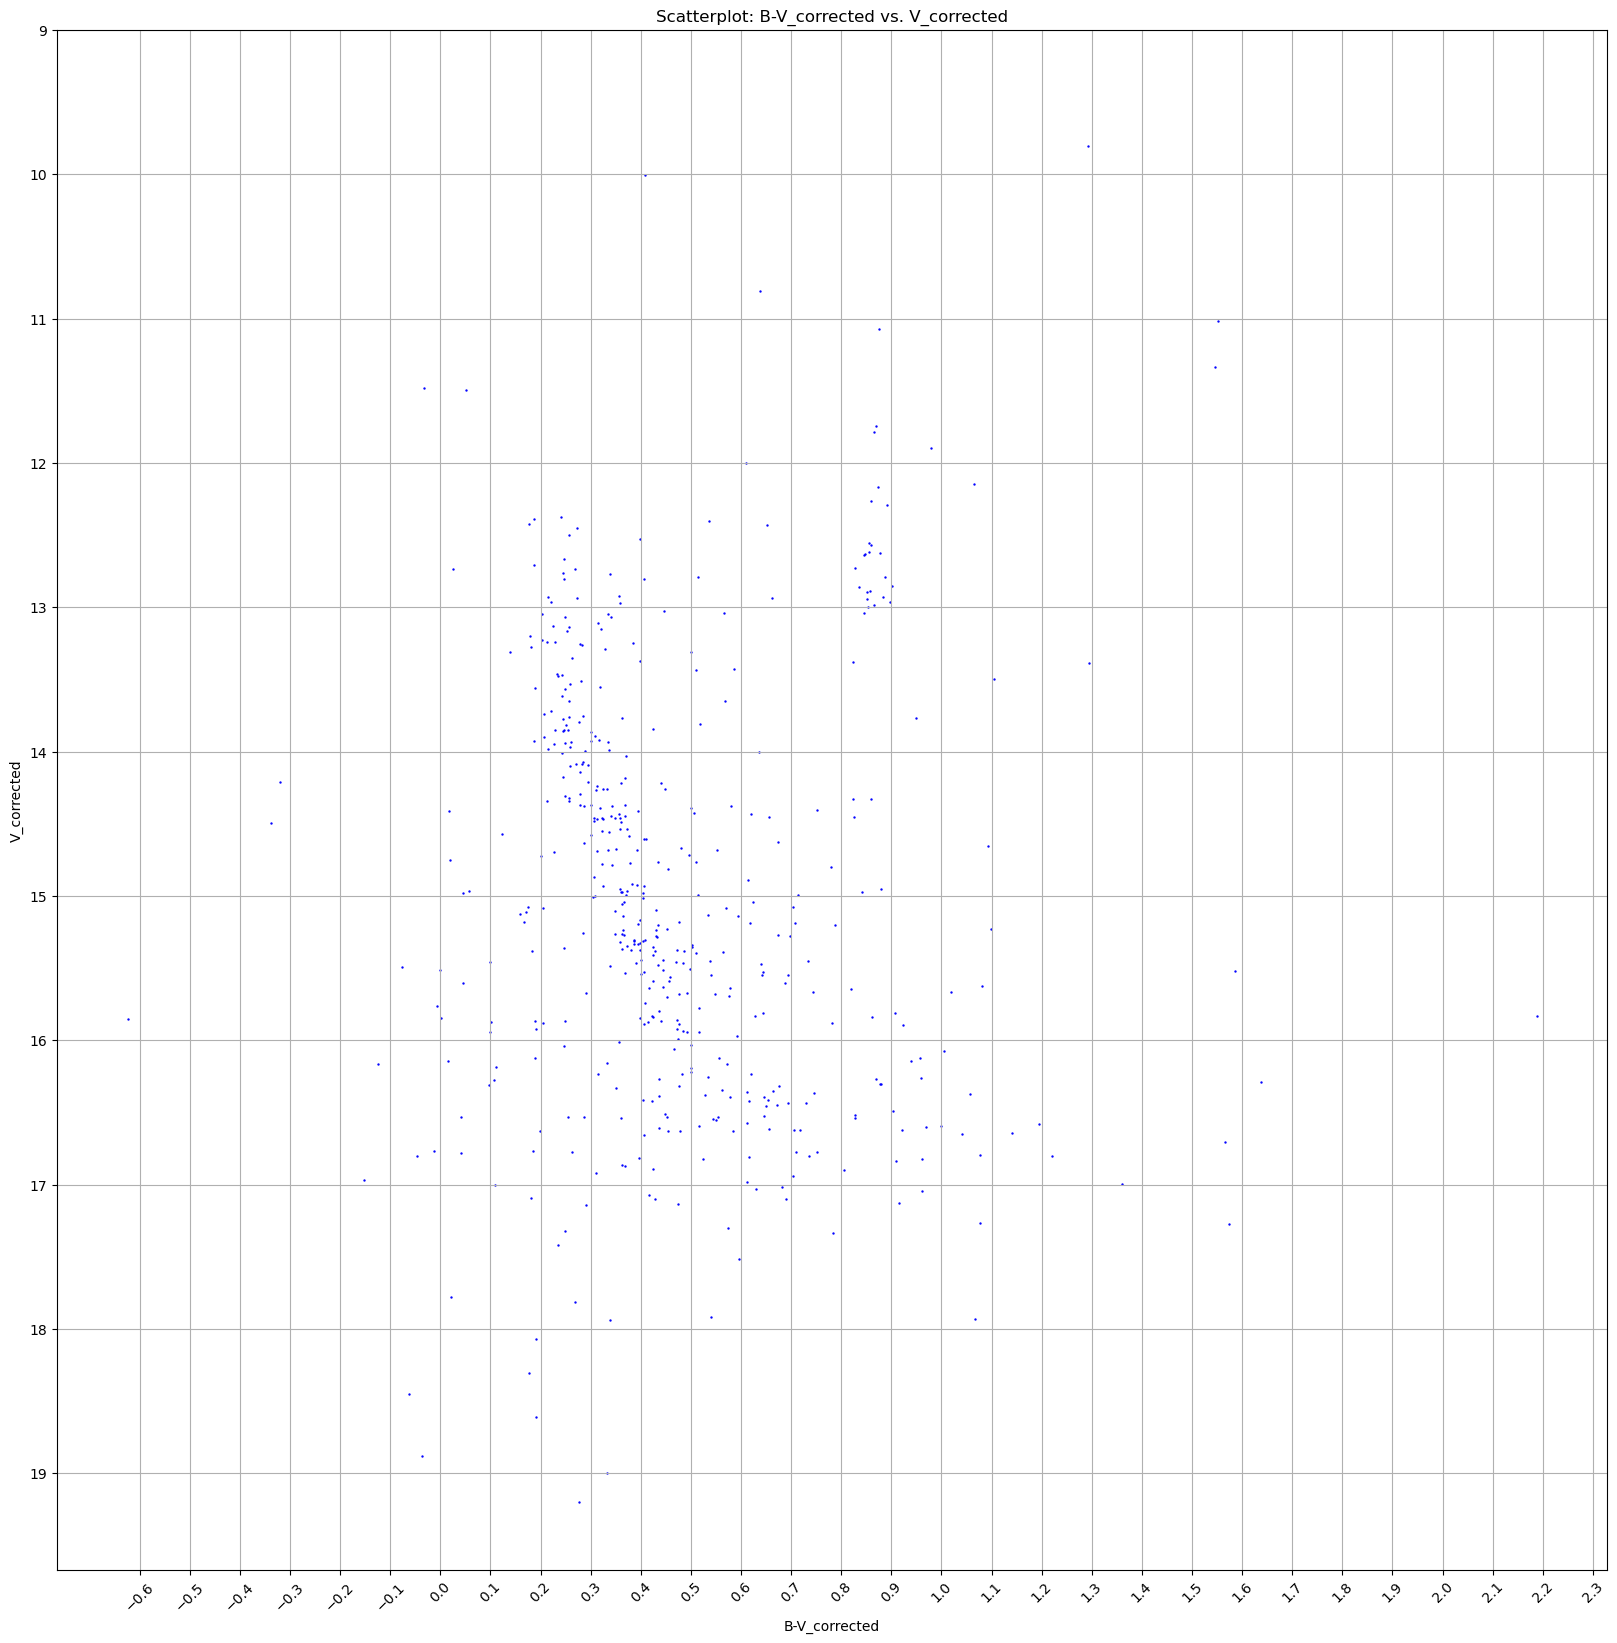

In [7]:
plt.figure(figsize=(20,20))  # Adjust the figsize as needed
plt.scatter(df['B-V_corrected'], df['V_corrected'], color='b', marker='.', s=2)

# Invert the y-axis
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('B-V_corrected')
plt.ylabel('V_corrected')
plt.title('Scatterplot: B-V_corrected vs. V_corrected')
plt.grid(True)

x_ticks = np.arange(-0.6, 2.4, 0.1)
y_ticks = np.arange(9, 19.5, 1)

plt.xticks(x_ticks, rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(y_ticks)

plt.savefig('ColorMagntiudeDiagram.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [8]:
def classify_spectral_type(bv_value):
    if np.isnan(bv_value):
        return 'NaN'
    elif bv_value <= -0.2:
        return 'O'
    elif -0.2 <= bv_value < 0.2:
        return 'B'
    elif 0.2 <= bv_value < 0.5:
        return 'A'
    elif 0.5 <= bv_value < 0.7:
        return 'F'
    elif 0.7 <= bv_value < 1:
        return 'G'
    elif 1 <= bv_value < 1.6:
        return 'K'
    else:
        return 'M'

In [19]:
# Apply the classify_spectral_type function to df['B-V_corrected']
df['spectral_type'] = df['B-V_corrected'].dropna().apply(classify_spectral_type)

# Count the occurrences of each spectral type
spectral_type_counts = df['spectral_type'].value_counts()

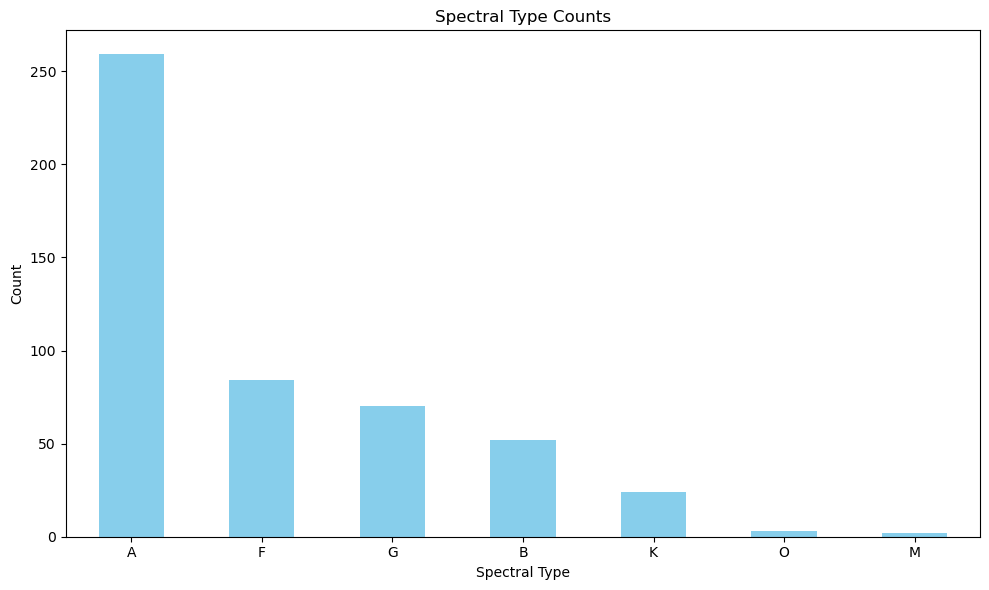

In [27]:
# Create a bar graph
plt.figure(figsize=(10, 6))
spectral_type_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Spectral Type')
plt.ylabel('Count')
plt.title('Spectral Type Counts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('SpectralCounts.pdf', format='pdf', bbox_inches='tight')
plt.show()